In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import pickle
import cloudpickle
from comparers import ModelComparer
from util import calc_ground_truth_constraints, constraint_matrix_to_rules
from tasks.boston_housing import make_task3 as make_task
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
clf_a, clf_b, X, y, feature_names, categorical_features, feature_precisions = make_task()
comparer = ModelComparer(clf_a, clf_b, feature_names)

Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


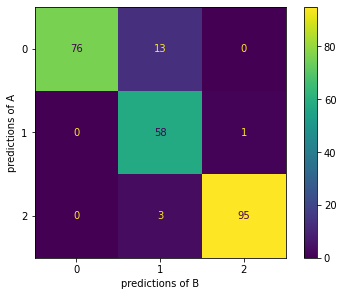

In [3]:
comparer.plot_confusion_matrix(X)

# Ground Truth

In [4]:
%%time
for label in comparer.difference_class_names:
    print(label)
    ground_truth_instance_indices, ground_truth = calc_ground_truth_constraints(comparer, feature_precisions, X, label)
    with open(f'ground_truth.{label}.pickle', 'wb') as f:
        pickle.dump((ground_truth_instance_indices, ground_truth), f)
    rules = constraint_matrix_to_rules(ground_truth, feature_names)
    for instance_idx, rule in zip(ground_truth_instance_indices, rules):
        print(f'{instance_idx}: {rule}')
    print()

(0, 1)
8: 3.0 < CRIM <= 6.0 and ZN <= 0.0 and INDUS > 16.87 and RM <= 6.73 and AGE > 1.0 and DIS <= 4.72 and RAD > 21.4 and TAX > 499.0 and 16.71 < PTRATIO <= 20.73 and 13.9 < LSTAT <= 16.12
28: 0.0 < CRIM <= 3.0 and ZN <= 3.0 and INDUS > 13.87 and RM <= 8.07 and AGE > 1.0 and RAD <= 16.77 and 287.0 < TAX <= 508.0 and PTRATIO <= 17.14 and 10.29 < LSTAT <= 12.93
40: 1.0 < CRIM <= 4.0 and ZN <= 1.0 and INDUS > 16.97 and RM <= 7.33 and AGE > 0.0 and DIS <= 6.59 and RAD <= 23.9 and 222.0 < TAX <= 451.0 and PTRATIO <= 15.83 and 10.48 < LSTAT <= 13.13
42: CRIM <= 1.0 and ZN <= 4.0 and INDUS <= 10.63 and RM > 4.71 and AGE > 1.0 and RAD <= 8.67 and 260.0 < TAX <= 447.0 and PTRATIO > 20.07 and 16.39 < LSTAT <= 18.78
74: CRIM <= 1.0 and ZN <= 5.0 and 13.05 < INDUS <= 24.77 and RM > 4.59 and AGE > 1.0 and RAD <= 9.4 and 383.0 < TAX <= 597.0 and PTRATIO > 20.12 and 15.13 < LSTAT <= 17.85
151: 0.0 < CRIM <= 3.0 and ZN <= 0.0 and 7.25 < INDUS <= 18.12 and RM <= 6.39 and AGE > 1.0 and DIS <= 5.82 and